In [47]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями
from tensorflow.keras.optimizers import Adam, Adadelta

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time
import os

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
name_data = os.listdir('/content/drive/My Drive/DATAS/DataDialog/')
name_data

['SonaGruhanova.zip', 'IvanKochkarev.zip', 'KsushaBorsheva.zip']

In [53]:
import zipfile
for name in name_data :
  print (name)
  zip_ref = zipfile.ZipFile("/content/drive/My Drive/DATAS/DataDialog/{}".format(name), 'r')
  zip_ref.extractall('/content/texts/{}'.format(name))
  zip_ref.close()
  #!unzip -q str('/content/drive/My Drive/DATAS/DataDialog/{}'.format(name)) -d str('/content/texts/{}'.format(name))

SonaGruhanova.zip
IvanKochkarev.zip
KsushaBorsheva.zip


In [54]:
dialogs = {}
for name in name_data :
  dialogs[name] = os.listdir('texts/{}'.format(name))

In [55]:
dialogs

{'IvanKochkarev.zip': ['#3 07.05.2019_22.38 - 27.08.2019_15.58.txt',
  '#0 05.09.2018_19.46 - 04.03.2019_19.56.txt',
  '#6 25.03.2020_00.14 - 20.06.2020_14.18.txt',
  '#1 04.03.2019_20.08 - 01.04.2019_21.01.txt',
  '#4 27.08.2019_15.58 - 01.10.2019_20.30.txt',
  '#2 01.04.2019_21.04 - 07.05.2019_22.38.txt',
  '#5 01.10.2019_20.30 - 25.03.2020_00.14.txt'],
 'KsushaBorsheva.zip': ['#4 16.04.2020_13.23 - 02.06.2020_07.57.txt',
  '#1 21.10.2018_20.11 - 19.02.2019_21.57.txt',
  '#0 02.08.2018_09.35 - 21.10.2018_20.11.txt',
  '#3 21.06.2019_08.09 - 16.04.2020_13.23.txt',
  '#2 19.02.2019_21.57 - 20.06.2019_23.11.txt'],
 'SonaGruhanova.zip': ['#15 28.05.2018_17.44 - 01.08.2018_22.41.txt',
  '#10 14.02.2018_23.14 - 08.03.2018_19.25.txt',
  '#05 24.10.2017_21.18 - 01.11.2017_20.37.txt',
  '#19 19.01.2019_21.19 - 23.04.2019_09.57.txt',
  '#21 20.02.2020_22.29 - 03.06.2020_01.01.txt',
  '#18 13.11.2018_21.19 - 19.01.2019_21.19.txt',
  '#03 13.10.2017_11.06 - 19.10.2017_21.13.txt',
  '#09 24.01.20

In [72]:
import codecs
data = ""
for name in name_data :
  for filename in dialogs[name] :
    f = codecs.open("texts/" + name + '/' + filename, 'r')
    data += '\n' + f.read()
data[:100]

'\nСоня Груханова [sontofi] :\nне увидимся больше\n\nСоня Груханова [sontofi] :\nблоооо\n\nСоня Груханова [s'

In [101]:
person = ['Сергей Вольнов [id203419100] :\n', 'Соня Груханова [sontofi] :\n', 'Иван Кочкарёв [ivankochkoryov] :\n', 'Ксюша Борщёва [id236652243] :\n']
n = 4

In [73]:
print(data[:100])


Соня Груханова [sontofi] :
не увидимся больше

Соня Груханова [sontofi] :
блоооо

Соня Груханова [s


In [74]:
data = data.replace('\t', '\n')
x = data.split('\n\n')

In [80]:
data = ["" for i in range(n)]
for d in x :
  if ("#include" in d) :
    continue
  for i in range(n) :
   if person[i] in d :
     data[i] += d.replace(person[i], "") + " # "

In [81]:
data[3][:100]

'Нет, сначала начали заварушку с Францией, несколько поколений королей прошло и эта английская династ'

In [82]:
for i in range(n) :
  data[i] = data[i].replace('\n', ' # ')
data[2][:100]

' # Лкш # А лкш # Уже прошёл # И инополис # До 15 # Ну я могу #  # Ты указал # Что # Инополис школа #'

In [83]:
maxWordsCount = 15000
tokenizer = Tokenizer(num_words = maxWordsCount, filters='!"$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower = True, split = ' ', oov_token = 'unknown', char_level = False)
tokenizer.fit_on_texts(data)
items = list(tokenizer.word_index.items())
data = tokenizer.texts_to_sequences(data)

In [84]:
print(len(items))
items[:10]

17263


[('unknown', 1),
 ('#', 2),
 ('я', 3),
 ('не', 4),
 ('и', 5),
 ('а', 6),
 ('что', 7),
 ('в', 8),
 ('ты', 9),
 ('это', 10)]

In [85]:
def getSetFromIndexes(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна
  xSample = [] # Объявляем переменную для векторов
  wordsLen = len(wordIndexes) # Считаем количество слов
  index = 0 # Задаем начальный индекс 

  while (index + xLen <= wordsLen):# Идём по всей длине вектора индексов
    xSample.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
    index += step # Смещаеммся вперёд на step
    
  return xSample

In [86]:
X = []
Y = []
for i in range(n) :
  for j in getSetFromIndexes(data[i], 20, 10) :
    X.append(j)
    Y.append(utils.to_categorical(i, n))
X = tokenizer.sequences_to_matrix(X, mode='binary')
Y = np.array(Y)

In [87]:
print(X.shape)
print(Y.shape)

(14671, 15000)
(14671, 4)


In [88]:
X[2]

array([0., 0., 1., ..., 0., 0., 0.])

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size = 0.25, random_state = 42) 

In [90]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11003, 15000)
(11003, 4)
(3668, 15000)
(3668, 4)


Epoch 1/7
86/86 [==============================] - 1s 15ms/step - loss: 0.8262 - accuracy: 0.6699 - mae: 0.2472 - val_loss: 0.3880 - val_accuracy: 0.8653 - val_mae: 0.1233
Epoch 2/7
86/86 [==============================] - 1s 14ms/step - loss: 0.1948 - accuracy: 0.9396 - mae: 0.0659 - val_loss: 0.2601 - val_accuracy: 0.9089 - val_mae: 0.0720
Epoch 3/7
86/86 [==============================] - 1s 14ms/step - loss: 0.0560 - accuracy: 0.9865 - mae: 0.0217 - val_loss: 0.2230 - val_accuracy: 0.9220 - val_mae: 0.0539
Epoch 4/7
86/86 [==============================] - 1s 14ms/step - loss: 0.0214 - accuracy: 0.9969 - mae: 0.0087 - val_loss: 0.2236 - val_accuracy: 0.9269 - val_mae: 0.0483
Epoch 5/7
86/86 [==============================] - 1s 14ms/step - loss: 0.0113 - accuracy: 0.9991 - mae: 0.0048 - val_loss: 0.2447 - val_accuracy: 0.9223 - val_mae: 0.0474
Epoch 6/7
86/86 [==============================] - 1s 14ms/step - loss: 0.0078 - accuracy: 0.9993 - mae: 0.0030 - val_loss: 0.2390 - val_acc

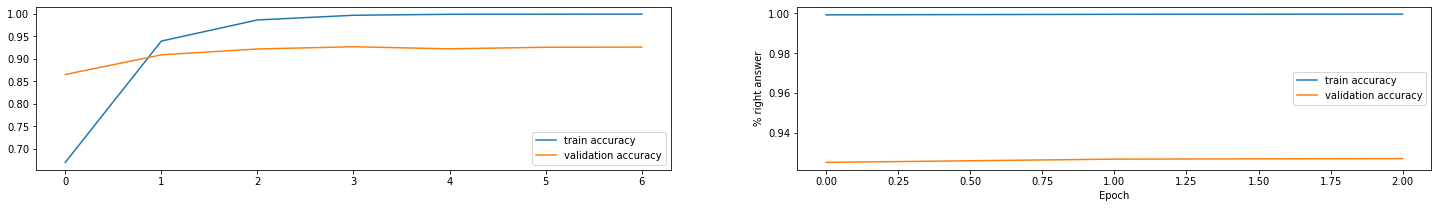

In [103]:
model = Sequential()
model.add(Dense(256, input_dim = maxWordsCount, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'tanh'))
model.add(Dropout(0.25))
model.add(Dense(n, activation='softmax'))
batch_size = [128, 100, 64, 32]
lr = [0.001, 0.0001]
epoch = [7, 3]

T = 2
fig, axs = plt.subplots(1, T, figsize=(25, 3))
for i in range(T) :
  model.compile(loss="categorical_crossentropy", optimizer=Adam(lr[i]), metrics=["accuracy", 'mae'])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=batch_size[i], 
                      epochs=epoch[i],
                      validation_data=(x_test, y_test),
                      verbose=1)
  axs[i].plot(history.history['accuracy'], label = 'train accuracy')
  axs[i].plot(history.history['val_accuracy'], label = 'validation accuracy')
  axs[i].legend()
plt.xlabel('Epoch')
plt.ylabel('% right answer')
plt.show()

In [104]:
x_test[0].shape

(15000,)

In [105]:
model.predict(x_test[0].reshape(1, 15000))

array([[2.4977606e-03, 9.9567336e-01, 1.0674428e-03, 7.6132832e-04]],
      dtype=float32)

In [111]:
for i in range(n) :
  good = 0
  all = 0
  for ind, j in enumerate(y_test) :
    if np.argmax(j) == i :
      all += 1
      if (np.argmax(model.predict(x_test[ind].reshape(1, maxWordsCount))) == i) :
        good += 1
  print ("test_accuracy on " + person[i] + " = ", round(good / all * 100, 1), "%") 

test_accuracy on Сергей Вольнов [id203419100] :
 =  91.8 %
test_accuracy on Соня Груханова [sontofi] :
 =  94.1 %
test_accuracy on Иван Кочкарёв [ivankochkoryov] :
 =  90.5 %
test_accuracy on Ксюша Борщёва [id236652243] :
 =  93.8 %
